CHUẨN BỊ THƯ VIỆN

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn
import scipy as sp

CHUẨN BỊ DỮ LIỆU

In [5]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cnf=confusion_matrix(y_test,prediction)
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[16  2]
 [ 6  1]]


              precision    recall  f1-score   support

      absent       0.73      0.89      0.80        18
     present       0.33      0.14      0.20         7

    accuracy                           0.68        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.62      0.68      0.63        25



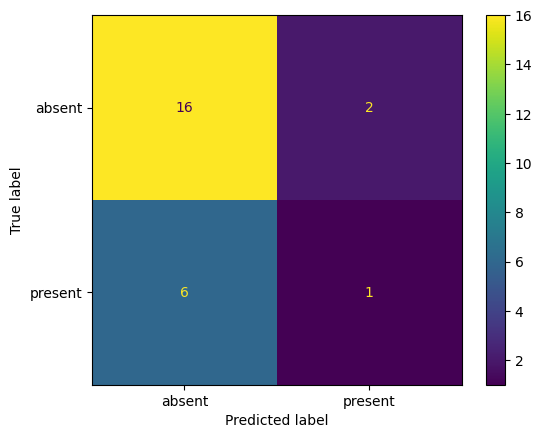

In [9]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf, display_labels = ["absent", "present"])

cm_display.plot()
plt.show()

In [10]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [11]:
kyphosis = DecisionTreeClassifier()
kyphosis.fit(X,y)

DecisionTreeClassifier()

VẼ DICISION TREE

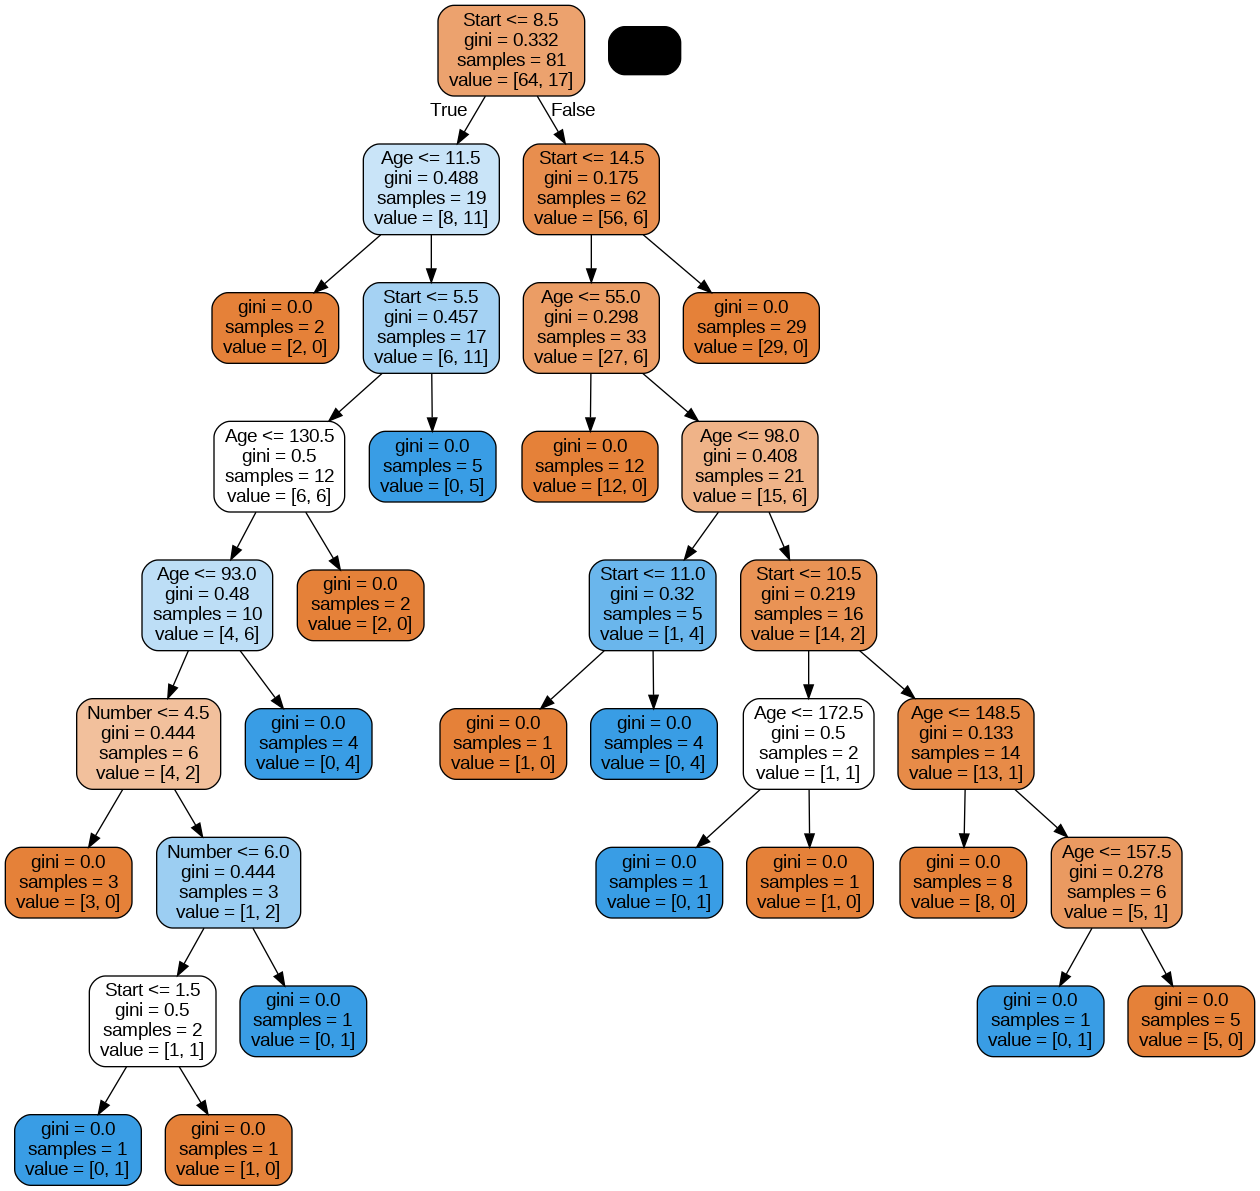

In [12]:
dot_data = StringIO()  
export_graphviz(kyphosis, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())  

RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
RandomForestClassifier(n_estimators=200)
rfc_pred = rfc.predict(X_test)

In [14]:
rfc_cnf=confusion_matrix(y_test,rfc_pred)
print(rfc_cnf)
print('\n')
print(classification_report(y_test,rfc_pred))

[[17  1]
 [ 5  2]]


              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25



In [ ]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rfc_cnf, display_labels = ["absent", "present"])

cm_display.plot()
plt.show()

In [15]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X,y)
RandomForestClassifier(n_estimators=200)

RandomForestClassifier(n_estimators=200)

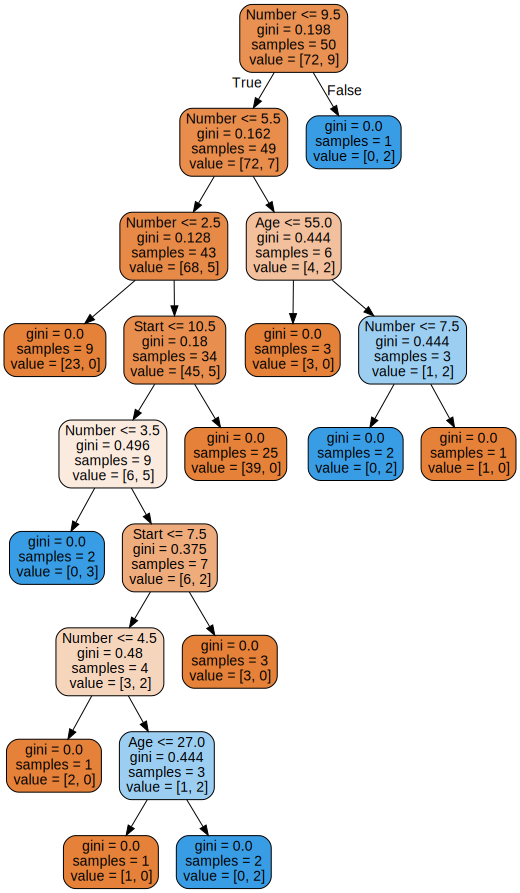

In [16]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=features,
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph